# Create visualization for each plate contribution and genotype contribution from the merged plate data

## Import libraries

In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


## Load in data frame and set paths

In [2]:
# path to tsv with LM coefficients
lm_results_dir <- file.path("./results")
lm_file <- file.path(lm_results_dir, "./linear_model_cp_features_concat_plate5_plate3_plate3prime.tsv")

# save path for figure
lm_fig_dir <- file.path("./figures")
lm_fig <- file.path(lm_fig_dir, "linear_model_cp_features_concat_plate5_genotype.png")

# Load and process linear model data
lm_df <- readr::read_tsv(
    lm_file,
    col_types = readr::cols(.default = "d", feature = "c")
)

print(dim(lm_df))
head(lm_df)

[1] 2271    8


feature,r2_score,cell_count_coef,Null_coef,WT_coef,Plate_3_coef,Plate_3_prime_coef,Plate_5_coef
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cytoplasm_AreaShape_Area,0.0765958885,-0.0017308270,-0.036435039,0.036435039,0.35019401,-0.068790988,-0.28140302
Cytoplasm_AreaShape_BoundingBoxArea,0.0763162026,-0.0016279567,-0.052329732,0.052329732,0.32052000,-0.074655214,-0.24586479
Cytoplasm_AreaShape_BoundingBoxMaximum_X,0.0008045350,-0.0001470321,-0.014859461,0.014859461,0.03482014,-0.014360499,-0.02045964
Cytoplasm_AreaShape_BoundingBoxMaximum_Y,0.0029239301,-0.0003326682,-0.003757436,0.003757436,0.07591667,-0.016993885,-0.05892278
Cytoplasm_AreaShape_BoundingBoxMinimum_X,0.0008459077,0.0001854822,-0.003690171,0.003690171,-0.03305397,0.001484524,0.03156945
Cytoplasm_AreaShape_BoundingBoxMinimum_Y,0.0009468733,0.0001755919,0.013436158,-0.013436158,-0.02361008,0.005032112,0.01857797


## Clean the data to use for visualizing each feature

In [3]:
# Arrange by absolute value coefficient
# Split out components of feature name for visualization
lm_df <- lm_df %>%
    dplyr::arrange(desc(abs(WT_coef))) %>%
    tidyr::separate(
        feature,
        into = c(
            "compartment",
            "feature_group",
            "measurement",
            "channel",
            "parameter1",
            "parameter2"
        ),
        sep = "_",
        remove = FALSE
    ) %>%
    dplyr::mutate(channel_cleaned = channel)

# Clean channel for visualization and interpretation
lm_df$channel_cleaned <-
    dplyr::recode(
        lm_df$channel_cleaned,
        "DAPI" = "nuclei",
        "GFP" = "ER",
        "RFP" = "actin",
        "CY5" = 'mito',
        .default = "other",
        .missing = "other"
    )

# Print to make sure that the above clean up worked
print(dim(lm_df))
head(lm_df, 10)


Warning message:
“Expected 6 pieces. Additional pieces discarded in 624 rows [1, 2, 3, 4, 5, 6,
7, 8, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, ...].”
Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 927 rows [9, 10, 11, 16,
25, 27, 28, 30, 35, 51, 65, 67, 68, 69, 71, 74, 77, 78, 86, 89, ...].”


[1] 2271   15


feature,compartment,feature_group,measurement,channel,parameter1,parameter2,r2_score,cell_count_coef,Null_coef,WT_coef,Plate_3_coef,Plate_3_prime_coef,Plate_5_coef,channel_cleaned
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Nuclei_Texture_InverseDifferenceMoment_GFP_3_03_256,Nuclei,Texture,InverseDifferenceMoment,GFP,3,03,0.09779942,0.0009164950,-0.2839512,0.2839512,-0.1161139,0.05399508,0.06211882,ER
Nuclei_Texture_Entropy_GFP_3_03_256,Nuclei,Texture,Entropy,GFP,3,03,0.10496429,-0.0010953524,0.2799925,-0.2799925,0.1442050,-0.06138464,-0.08282038,ER
Nuclei_Texture_Entropy_GFP_3_01_256,Nuclei,Texture,Entropy,GFP,3,01,0.10372339,-0.0010981947,0.2776951,-0.2776951,0.1452502,-0.06129427,-0.08395588,ER
Nuclei_Texture_Entropy_GFP_3_00_256,Nuclei,Texture,Entropy,GFP,3,00,0.10341533,-0.0011035170,0.2762986,-0.2762986,0.1471796,-0.06320341,-0.08397614,ER
Nuclei_Texture_Entropy_GFP_3_02_256,Nuclei,Texture,Entropy,GFP,3,02,0.10210722,-0.0010859433,0.2754367,-0.2754367,0.1446486,-0.06215404,-0.08249460,ER
Nuclei_Texture_InverseDifferenceMoment_GFP_3_00_256,Nuclei,Texture,InverseDifferenceMoment,GFP,3,00,0.09374944,0.0009405348,-0.2744036,0.2744036,-0.1230326,0.05645318,0.06657943,ER
Nuclei_Texture_InverseDifferenceMoment_GFP_3_01_256,Nuclei,Texture,InverseDifferenceMoment,GFP,3,01,0.09209160,0.0009157879,-0.2739332,0.2739332,-0.1172161,0.05313333,0.06408276,ER
Nuclei_Texture_InverseDifferenceMoment_GFP_3_02_256,Nuclei,Texture,InverseDifferenceMoment,GFP,3,02,0.08849980,0.0008795532,-0.2687987,0.2687987,-0.1155667,0.05417964,0.06138705,ER
Cells_Correlation_Manders_CY5_GFP,Cells,Correlation,Manders,CY5,GFP,NA,0.07935582,0.0006526805,0.2676279,-0.2676279,-0.1668186,0.10170252,0.06511611,mito


## Generate the scatter plot LM visualization

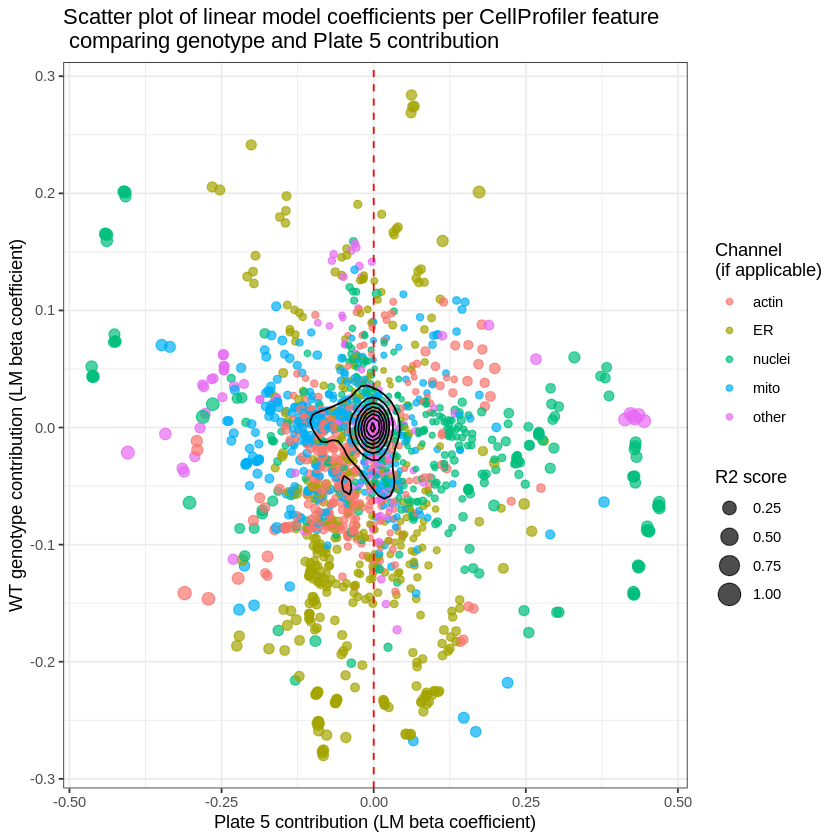

In [4]:
# Specify order so that the organelles match the correct color (red, green, blue)
color_order <- c("actin", "ER", "nuclei", "mito", "other")

# Plot the linear model coefficients for the WT genotype contribution
# Positive coeff = more likely to be WT cell if feature increases
# Negative coeff = more likely to be Null cell if feature increases
lm_fig_gg <- (
    ggplot(lm_df, aes(x = Plate_5_coef, y = WT_coef))
    +
        geom_point(aes(size = r2_score, color = factor(channel_cleaned, levels = color_order)), alpha = 0.7)
        +
        geom_vline(xintercept = 0, linetype = "dashed", color = "red")
        +
        geom_density2d(color = "black", show.legend = FALSE)
        +
        theme_bw()
        +
        guides(
            color = guide_legend(title = "Channel\n(if applicable)", order = 1),
            size = guide_legend(title = "R2 score")
        )
        +
        ylab("WT genotype contribution (LM beta coefficient)")
        +
        xlab("Plate 5 contribution (LM beta coefficient)")
        +
        ggtitle("Scatter plot of linear model coefficients per CellProfiler feature\n comparing genotype and Plate 5 contribution") # nolint
)

# Output figure
ggsave(lm_fig, lm_fig_gg, dpi = 500, height = 6, width = 6)

# Show figure
lm_fig_gg
